In [64]:
import json
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [65]:
path = r"Q:\Python_Data\dataset"
sonar = pd.read_csv(path + "\\sonar.csv", header=None)

In [66]:
print(sonar.shape)
length = sonar.shape[0]
xData, yData = sonar.iloc[:,:-1], sonar.iloc[:,-1]

(208, 61)


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

yData = LabelEncoder().fit_transform(yData)

xTrn, xTst, yTrn, yTst = train_test_split(xData, yData,
                                         test_size=0.33,
                                         shuffle=True)

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [69]:
scaler = StandardScaler()
xTrn = scaler.fit_transform(xTrn)
xTst = scaler.transform(xTst)

In [72]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
def makeModel(in_dim):
    model = tf.keras.Sequential([
        Dense(64, input_dim=in_dim, activation='relu'),
        Dense(128, activation='relu'),
        Dropout(0.02),
        Dense(256, activation='relu'),
        Dense(512, activation='relu'),
        Dropout(0.02),
        Dense(1, activation='sigmoid')
    ])
    return model

In [98]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

loss_lst = []
acc_lst = []
history_lst = []
for i, (trn_idx, val_idx) in enumerate(kf.split(xTrn)):
    print(i+1, 'KFOLD')
    X_train, X_val = xTrn[trn_idx], xTrn[val_idx]
    y_train, y_val = yTrn[trn_idx], yTrn[val_idx]
    
    model = makeModel(X_train.shape[1])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=20,
                        batch_size=1024, verbose=0,
                        validation_data=(X_val, y_val))
    history_lst.append(history)
    score = model.evaluate(xTst, yTst)
    loss_lst.append(score[0])
    acc_lst.append(score[1])       

1 KFOLD
69/69 [==============================] - 0s 275us/sample - loss: 0.4293 - acc: 0.8551
2 KFOLD
69/69 [==============================] - 0s 246us/sample - loss: 0.6056 - acc: 0.8696
3 KFOLD
69/69 [==============================] - 0s 246us/sample - loss: 0.6173 - acc: 0.7681
4 KFOLD
69/69 [==============================] - 0s 245us/sample - loss: 0.4294 - acc: 0.8986
5 KFOLD
69/69 [==============================] - 0s 275us/sample - loss: 0.7237 - acc: 0.7971


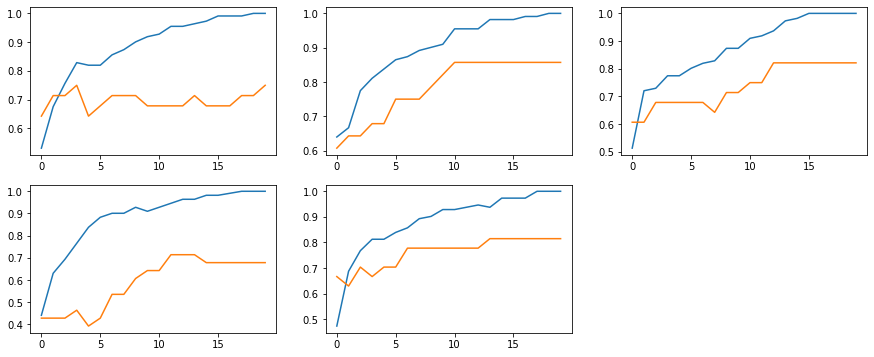

In [99]:
plt.figure(figsize=(15,6))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(history_lst[i].history['acc'])
    plt.plot(history_lst[i].history['val_acc'])

In [100]:
np.average(acc_lst)
# 정답률 83%

0.8376811

In [101]:
model = makeModel(xTrn.shape[1])
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=['accuracy'])
    
history = model.fit(xTrn, yTrn, epochs=20, validation_split=0.2,
                    batch_size=1024, verbose=1)

Train on 111 samples, validate on 28 samples
Epoch 1/20
111/111 [==============================] - 3s 23ms/sample - loss: 0.7073 - acc: 0.4685 - val_loss: 0.6182 - val_acc: 0.7143
Epoch 2/20
111/111 [==============================] - 0s 189us/sample - loss: 0.6390 - acc: 0.6486 - val_loss: 0.5748 - val_acc: 0.7500
Epoch 3/20
111/111 [==============================] - 0s 198us/sample - loss: 0.5829 - acc: 0.7928 - val_loss: 0.5496 - val_acc: 0.7857
Epoch 4/20
111/111 [==============================] - 0s 171us/sample - loss: 0.5316 - acc: 0.8468 - val_loss: 0.5286 - val_acc: 0.7500
Epoch 5/20
111/111 [==============================] - 0s 180us/sample - loss: 0.4832 - acc: 0.8739 - val_loss: 0.5035 - val_acc: 0.7500
Epoch 6/20
111/111 [==============================] - 0s 180us/sample - loss: 0.4302 - acc: 0.8919 - val_loss: 0.4750 - val_acc: 0.7500
Epoch 7/20
111/111 [==============================] - 0s 180us/sample - loss: 0.3853 - acc: 0.9099 - val_loss: 0.4473 - val_acc: 0.7857
Epoc

In [104]:
model.evaluate(xTst, yTst)

69/69 [==============================] - 0s 332us/sample - loss: 0.2970 - acc: 0.8696


[0.29701056687728217, 0.8695652]

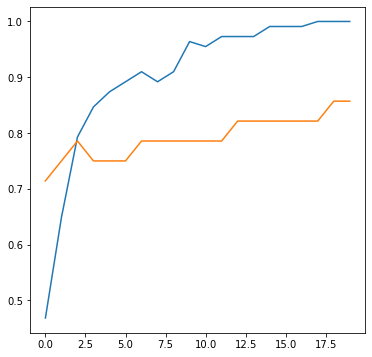

In [105]:
plt.figure(figsize=(6,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [97]:
# 정답률 85% 
# kfold보다 나은듯